# Online Gaussian Process

### Loading necessary packages
## Preliminary steps
### Load the necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using MLDataUtils, Distributions

### We create a toy dataset with a noisy sinus

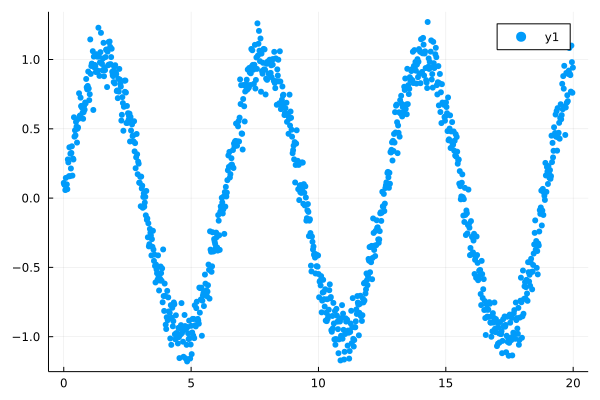

In [2]:
N = 2000
σ = 0.1
X, y = noisy_sin(N, 0, 20; noise=σ)
X_train = X[1:2:end];
y_train = y[1:2:end]; # We split the data equally
X_test = X[2:2:end];
y_test = y[2:2:end];
scatter(X_train, y_train)

### Plot model at each step

In [3]:
function plot_model(model, X, X_test, X_train, y_train)
    y_pred, sig_pred = proba_y(model, X_test)
    plot(X, sin; lab="f", color=:black, lw=3.0, ylims=(-2, 2))
    plot!(X_test, y_pred; ribbon=sqrt.(sig_pred), lab="Prediction", lw=3.0)
    scatter!(X_train, y_train; msw=0.0, alpha=0.5, lab="Data")
    return scatter!(first.(model[1].Z), mean(model[1]); lab="IP")
end

plot_model (generic function with 1 method)

## Model training
### Create a kernel

In [4]:
k = SqExponentialKernel();

### Create an inducing point selection method

In [5]:
IP_alg = OIPS(0.8);

### Create the model and stream the data

┌ Info: Saved animation to 
└   fn = "/tmp/jl_zNAtgs.gif"


Plots.AnimatedGif("/tmp/jl_zNAtgs.gif")
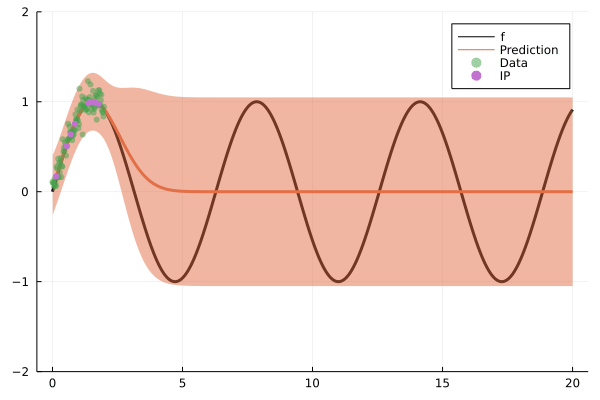

In [6]:
model = OnlineSVGP(k, GaussianLikelihood(σ), AnalyticVI(), IP_alg; optimiser=false)
anim = Animation()
size_batch = 100
let state = nothing
    for (i, (X_batch, y_batch)) in
        enumerate(eachbatch((X_train, y_train); obsdim=1, size=size_batch))
        _, state = train!(model, X_batch, y_batch, state; iterations=5)
        plot_model(
            model, X, X_test, X_train[1:(i * size_batch)], y_train[1:(i * size_batch)]
        )
        frame(anim)
    end
end
gif(anim; fps=4)

This works just as well with any likelihood! Just try it out!

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*